In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_users = pd.read_csv("user_mission.csv")
df_agg = pd.read_csv("agg_info.csv")


In [3]:
df_users

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08 14:32:31+00:00,2018-10-16 00:23:35+00:00,True,1411458
1,2018-10-16 00:23:35+00:00,NaN,False,1411458
2,2018-10-19 19:16:52+00:00,2018-10-27 00:25:26+00:00,True,1424093
3,2018-10-27 00:25:26+00:00,2018-11-02 17:05:29+00:00,True,1424093
4,2018-11-10 18:43:20+00:00,NaN,False,1424093
...,...,...,...,...
27978,2018-12-13 21:53:13+00:00,2019-10-11 02:31:17+00:00,True,1368340
27979,2018-11-23 21:28:39+00:00,2018-12-13 21:53:13+00:00,True,1368340
27980,2018-12-12 15:07:56+00:00,NaN,False,1454145
27981,2018-11-08 11:27:29+00:00,2018-11-20 21:56:59+00:00,True,1454145


In [4]:
df_agg


,USER_ID,PST_DATE,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
0,423344,2018-11-03,0.0,0,61.600000,40,0.0,0.0
1,427412,2018-10-24,0.0,0,21.900000,25,0.0,0.0
2,427412,2018-10-25,0.0,0,39.250000,26,0.0,0.0
3,652251,2018-12-14,0.0,0,124.333336,56,0.0,3.0
4,658572,2018-11-18,0.0,0,222.516660,49,0.0,0.0
...,...,...,...,...,...,...,...,...
468035,1212312,2018-12-30,0.0,0,26.733334,8,0.0,4.0
468036,1212312,2018-12-31,0.0,0,26.683332,4,0.0,4.0
468037,1213718,2018-11-27,4.0,3,57.633335,24,0.0,3.0
468038,1238045,2018-10-21,0.0,0,62.683334,16,0.0,0.0


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27983 entries, 0 to 27982
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   START_TIMESTAMP  27983 non-null  object
 1   END_TIMESTAMP    23992 non-null  object
 2   COMPLETED        27983 non-null  bool  
 3   USER_ID          27983 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 683.3+ KB


In [6]:
df_users['START_TIMESTAMP'] = pd.to_datetime(df_users['START_TIMESTAMP']).dt.date
df_users['END_TIMESTAMP'] = pd.to_datetime(df_users['END_TIMESTAMP']).dt.date
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27983 entries, 0 to 27982
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   START_TIMESTAMP  27983 non-null  object
 1   END_TIMESTAMP    23992 non-null  object
 2   COMPLETED        27983 non-null  bool  
 3   USER_ID          27983 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 683.3+ KB


In [7]:
df_users

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08,2018-10-16,True,1411458
1,2018-10-16,NaT,False,1411458
2,2018-10-19,2018-10-27,True,1424093
3,2018-10-27,2018-11-02,True,1424093
4,2018-11-10,NaT,False,1424093
...,...,...,...,...
27978,2018-12-13,2019-10-11,True,1368340
27979,2018-11-23,2018-12-13,True,1368340
27980,2018-12-12,NaT,False,1454145
27981,2018-11-08,2018-11-20,True,1454145


In [8]:
# pd.isna(df_users.iloc[1]['END_TIMESTAMP'])
df_users['END_TIMESTAMP'].fillna(value=0,inplace=True)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27983 entries, 0 to 27982
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   START_TIMESTAMP  27983 non-null  object
 1   END_TIMESTAMP    27983 non-null  object
 2   COMPLETED        27983 non-null  bool  
 3   USER_ID          27983 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 683.3+ KB


In [9]:
df_users

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08,2018-10-16,True,1411458
1,2018-10-16,0,False,1411458
2,2018-10-19,2018-10-27,True,1424093
3,2018-10-27,2018-11-02,True,1424093
4,2018-11-10,0,False,1424093
...,...,...,...,...
27978,2018-12-13,2019-10-11,True,1368340
27979,2018-11-23,2018-12-13,True,1368340
27980,2018-12-12,0,False,1454145
27981,2018-11-08,2018-11-20,True,1454145


In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468040 entries, 0 to 468039
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   USER_ID                    468040 non-null  int64  
 1   PST_DATE                   468040 non-null  object 
 2   NUM_CONVOS                 468040 non-null  float64
 3   NUM_ALL_MEALS              468040 non-null  int64  
 4   TOTAL_ACTIVITY_MINUTES2    468040 non-null  float64
 5   NUM_ACTIVITY_MEASUREMENTS  468040 non-null  int64  
 6   NUM_WEIGHTS                468040 non-null  float64
 7   NUM_NOTIFS                 468040 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 28.6+ MB


In [11]:
# Get all users who's mission are not completed
users_incomplete = df_users[df_users['COMPLETED'] == False]
users_incomplete

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
1,2018-10-16,0,False,1411458
4,2018-11-10,0,False,1424093
8,2018-12-01,0,False,1418958
12,2018-11-02,0,False,1445159
13,2018-11-08,0,False,1449004
...,...,...,...,...
27937,2018-11-18,0,False,1463782
27955,2018-12-24,0,False,1208291
27963,2018-11-13,0,False,1408642
27972,2018-11-15,0,False,1458694


In [12]:
# Get all users who's mission are not completed
users_complete = df_users[df_users['COMPLETED'] == True]
users_complete

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08,2018-10-16,True,1411458
2,2018-10-19,2018-10-27,True,1424093
3,2018-10-27,2018-11-02,True,1424093
5,2018-11-02,2018-11-10,True,1424093
6,2018-10-12,2018-10-19,True,1424093
...,...,...,...,...
27977,2018-11-11,2018-11-23,True,1368340
27978,2018-12-13,2019-10-11,True,1368340
27979,2018-11-23,2018-12-13,True,1368340
27981,2018-11-08,2018-11-20,True,1454145


In [13]:
list_users_incomplete = users_incomplete['USER_ID'].unique()
list_users_incomplete


array([1411458, 1424093, 1418958, ..., 1408642, 1458694, 1454145],
      dtype=int64)

In [14]:
list_users_complete = users_complete['USER_ID'].unique()
list_users_complete


array([1411458, 1424093, 1418958, ..., 1471332, 1368340, 1454145],
      dtype=int64)

In [15]:
avg_num_convos = []
avg_num_all_meals = []
avg_total_minutes= []
avg_activity_measurements = []
avg_weights = []
avg_notifications = []

for x in list_users_incomplete:
    
    agg_records = df_agg[df_agg['USER_ID']==x]
    
    avg_num_convos.append(agg_records['NUM_CONVOS'].mean())
    avg_num_all_meals.append(agg_records['NUM_ALL_MEALS'].mean())
    avg_total_minutes.append(agg_records['TOTAL_ACTIVITY_MINUTES2'].mean())
    avg_activity_measurements.append(agg_records['NUM_ACTIVITY_MEASUREMENTS'].mean())
    avg_weights.append(agg_records['NUM_WEIGHTS'].mean())
    avg_notifications.append(agg_records['NUM_NOTIFS'].mean())



# stats for user (incomplete mission)
avg_num_convos_icm = sum(avg_num_convos)/len(avg_num_convos)
avg_num_all_meals_icm = sum(avg_num_all_meals)/len(avg_num_all_meals)
avg_total_minutes_icm= sum(avg_total_minutes)/len(avg_total_minutes)
avg_activity_measurements_icm = sum(avg_activity_measurements)/len(avg_activity_measurements)
avg_weights_icm =  sum(avg_weights)/len(avg_weights)
avg_notifications_icm = sum(avg_notifications)/len(avg_notifications)

print(round(avg_num_convos_icm,2))
print(round(avg_num_all_meals_icm,2))
print(round(avg_total_minutes_icm,2))
print(round(avg_activity_measurements_icm,2))
print(round(avg_weights_icm,2))
print(round(avg_notifications_icm,2))

1.03
0.74
58.02
20.83
0.16
2.01


In [16]:
avg_num_convos = []
avg_num_all_meals = []
avg_total_minutes= []
avg_activity_measurements = []
avg_weights = []
avg_notifications = []

for x in list_users_complete:
    
    agg_records = df_agg[df_agg['USER_ID']==x]
    
    avg_num_convos.append(agg_records['NUM_CONVOS'].mean())
    avg_num_all_meals.append(agg_records['NUM_ALL_MEALS'].mean())
    avg_total_minutes.append(agg_records['TOTAL_ACTIVITY_MINUTES2'].mean())
    avg_activity_measurements.append(agg_records['NUM_ACTIVITY_MEASUREMENTS'].mean())
    avg_weights.append(agg_records['NUM_WEIGHTS'].mean())
    avg_notifications.append(agg_records['NUM_NOTIFS'].mean())



# stats for user (complete mission)
avg_num_convos_cm = sum(avg_num_convos)/len(avg_num_convos)
avg_num_all_meals_cm = sum(avg_num_all_meals)/len(avg_num_all_meals)
avg_total_minutes_cm= sum(avg_total_minutes)/len(avg_total_minutes)
avg_activity_measurements_cm = sum(avg_activity_measurements)/len(avg_activity_measurements)
avg_weights_cm =  sum(avg_weights)/len(avg_weights)
avg_notifications_cm = sum(avg_notifications)/len(avg_notifications)

print(round(avg_num_convos_cm,2))
print(round(avg_num_all_meals_cm,2))
print(round(avg_total_minutes_cm,2))
print(round(avg_activity_measurements_cm,2))
print(round(avg_weights_cm,2))
print(round(avg_notifications_cm,2))


1.48
1.18
66.25
22.66
0.22
2.02


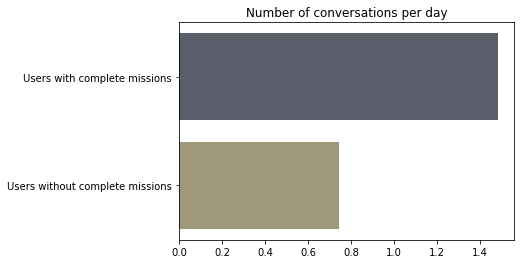

In [17]:
plt.title("Number of conversations per day")
sns.barplot(x=[avg_num_convos_cm,avg_num_all_meals_icm],y=['Users with complete missions','Users without complete missions'],palette="cividis")

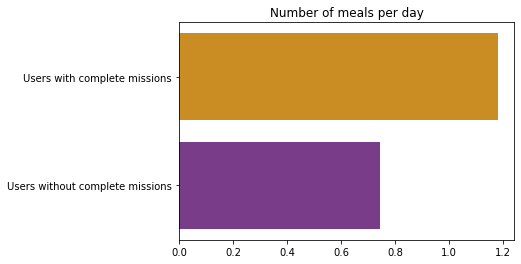

In [18]:
plt.title("Number of meals per day")
sns.barplot(x=[avg_num_all_meals_cm,avg_num_all_meals_icm],y=['Users with complete missions','Users without complete missions'],palette="CMRmap_r")

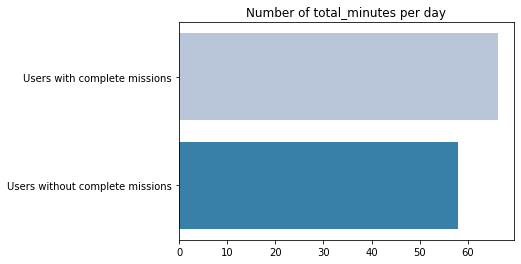

In [19]:
plt.title("Number of total_minutes per day")
sns.barplot(x=[avg_total_minutes_cm,avg_total_minutes_icm],y=['Users with complete missions','Users without complete missions'],palette="PuBu")

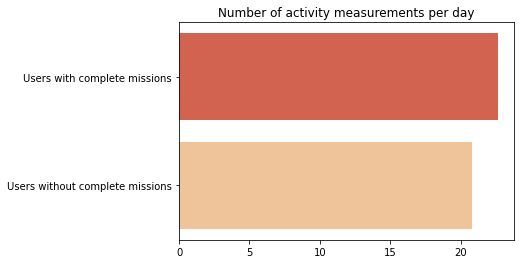

In [20]:
plt.title("Number of activity measurements per day")
sns.barplot(x=[avg_activity_measurements_cm,avg_activity_measurements_icm],y=['Users with complete missions','Users without complete missions'],palette="OrRd_r")

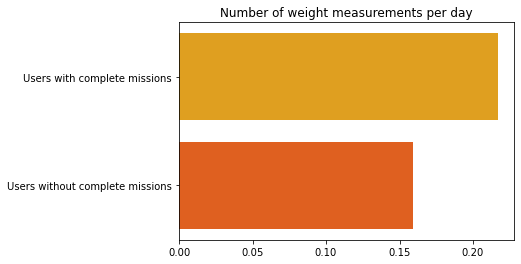

In [21]:
plt.title("Number of weight measurements per day")
sns.barplot(x=[avg_weights_cm,avg_weights_icm],y=['Users with complete missions','Users without complete missions'],palette="autumn_r")

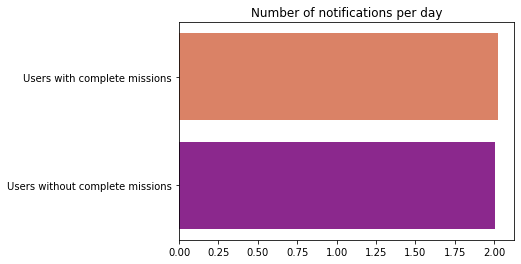

In [22]:
plt.title("Number of notifications per day")
sns.barplot(x=[avg_notifications_cm,avg_notifications_icm],y=['Users with complete missions','Users without complete missions'],palette="plasma_r")

In [23]:
unique_users = df_users['USER_ID'].unique()
unique_users

array([1411458, 1424093, 1418958, ..., 1471332, 1368340, 1454145],
      dtype=int64)

In [24]:
all_records = {}
for x in unique_users:
    records = len(df_users[df_users['USER_ID']==x])
    all_records[x] = records

all_records = sorted(all_records.items(), key=lambda x: x[1], reverse=True)




In [26]:
max_records_users = all_records[0:5]
max_records_users

[(1463647, 16), (1411505, 14), (1413676, 14), (1415709, 14), (1408972, 14)]

In [27]:
df_users[df_users['USER_ID']==max_records_users[0][0]]


,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
25239,2018-11-21,2018-11-29,True,1463647
25240,2018-11-05,2018-11-13,True,1463647
25241,2018-12-13,2018-12-22,True,1463647
25242,2018-12-31,2019-01-10,True,1463647
25243,2018-11-29,2018-12-06,True,1463647
25244,2018-12-06,2018-12-13,True,1463647
25245,2018-12-22,2018-12-31,True,1463647
25246,2018-11-13,2018-11-21,True,1463647
25247,2018-11-21,2018-11-29,True,1463647
25248,2018-11-05,2018-11-13,True,1463647


In [28]:
df_agg[df_agg['USER_ID']==max_records_users[0][0]]

,USER_ID,PST_DATE,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
1591,1463647,2018-12-04,0.0,0,20.800000,3,0.0,4.0
5056,1463647,2018-11-27,2.0,3,23.933332,7,1.0,3.0
16155,1463647,2018-11-28,0.0,0,26.883333,7,0.0,3.0
17529,1463647,2018-12-06,1.0,1,179.433330,13,0.0,2.0
25369,1463647,2019-01-01,2.0,2,9.250000,6,0.0,4.0
37482,1463647,2018-11-23,4.0,3,70.250000,11,0.0,2.0
37483,1463647,2018-12-18,1.0,4,10.583333,4,0.0,4.0
37484,1463647,2018-12-27,2.0,1,5.000000,1,0.0,3.0
40300,1463647,2018-12-21,1.0,3,20.600000,6,0.0,2.0
58074,1463647,2018-12-09,1.0,2,26.733334,6,0.0,3.0
